
Prediction of Heart Disease Using Supervised Machine Learning Classification Algorithms



In [ ]:
# Import Libraries

import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
heart_disease = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
heart_disease.shape

(319795, 18)

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
heart_disease.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
heart_disease['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

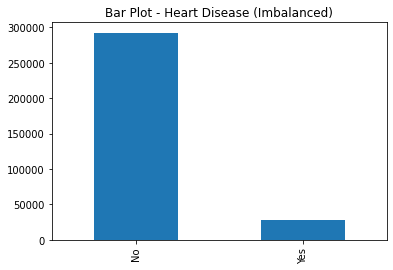

In [ ]:
heart_disease['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Bar Plot - Heart Disease (Imbalanced)')
plt.show()

In [ ]:
# Balance Dataset
sample_size = 7500 # Make dataset smaller and more manageable

# Source: https://stackoverflow.com/questions/41858827/selecting-n-elements-of-each-class
heart_disease = heart_disease.groupby('HeartDisease', as_index=False).apply(lambda array: array.loc[np.random.choice(array.index, sample_size, False),:])

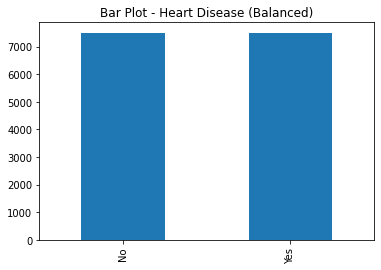

In [ ]:
heart_disease['HeartDisease'].value_counts().plot(kind='bar')
plt.title('Bar Plot - Heart Disease (Balanced)')
plt.show()

In [ ]:
# Drop DiffWalking (have physical activity instead), GenHealth (have physical and mental instead), KidneyDisease, SkinCancer, Asthma, Race

#heart_disease.drop(['DiffWalking'], axis = 1, inplace=True)
#heart_disease

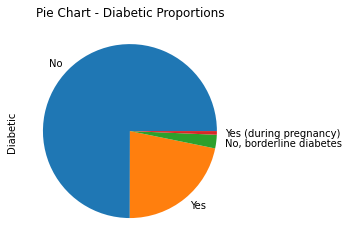

In [ ]:
heart_disease['Diabetic'].value_counts().plot.pie(title = 'Pie Chart - Diabetic Proportions')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


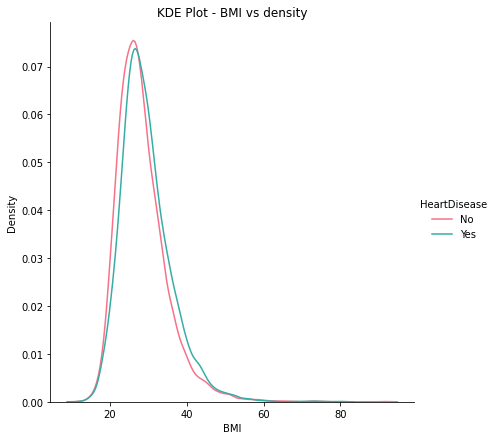

In [ ]:
sns.FacetGrid(heart_disease, hue='HeartDisease', palette='husl', size=6).map(sns.kdeplot, 'BMI').add_legend().set(title='KDE Plot - BMI vs density')

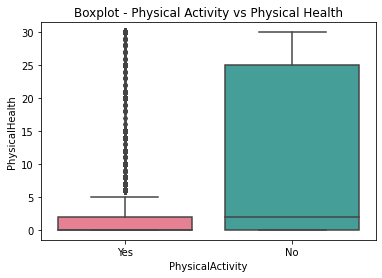

In [ ]:
sns.boxplot(x='PhysicalActivity', y='PhysicalHealth', palette='husl', data=heart_disease).set(title='Boxplot - Physical Activity vs Physical Health')
plt.show()

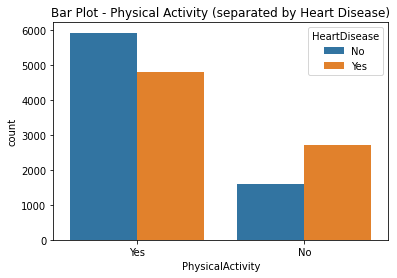

In [ ]:
sns.countplot(x='PhysicalActivity', data = heart_disease, hue = 'HeartDisease')
plt.title('Bar Plot - Physical Activity (separated by Heart Disease)')
plt.show()

In [ ]:
# Hot Encoding Function

def hot_encode(col_name):
  heart_disease[col_name] = pd.get_dummies(heart_disease[col_name], drop_first = True)

In [ ]:
# Hot Encoding Columnns with categorical binary data

hot_encode('HeartDisease')
hot_encode('DiffWalking')
hot_encode('Smoking')
hot_encode('AlcoholDrinking')
hot_encode('Stroke')
hot_encode('Sex')
hot_encode('PhysicalActivity')
hot_encode('Asthma')
hot_encode('SkinCancer')
hot_encode('KidneyDisease')

In [ ]:
# Helper Function - Function to make single item lists into single elements

def fix_list(lst):
  newlst = []
  for x in lst:
    newlst.append(x[0])
  return newlst

In [ ]:
# Ordinal Encoding Function
# Source: https://medium.com/bycodegarage/encoding-categorical-data-in-machine-learning-def03ccfbf40

def ordinal_encode(col_name):
  from sklearn.preprocessing import OrdinalEncoder

  # Define ordinal encodering
  encoder = OrdinalEncoder()

  # Transform data
  col_encoding = encoder.fit_transform(heart_disease[[col_name]]) # numpy array
  col_encoding = col_encoding.tolist() # now have list of lists (single element)
  # Make list of single elements
  col_encoding = fix_list(col_encoding)

  # Replace original column
  heart_disease[col_name] = col_encoding

In [ ]:
# Hot Encoding Columnns with categorical multinominal data

ordinal_encode('AgeCategory')
ordinal_encode('Race')
ordinal_encode('Diabetic')
ordinal_encode('GenHealth')

In [ ]:
heart_disease.head()

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  \
0 305189             0  24.80        0                0       0   
  197462             0  25.02        1                1       1   
  131383             0  46.17        0                0       0   
  143479             0  29.69        0                0       0   
  235187             0  27.28        1                0       0   

          PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0 305189             0.0           0.0            0    0          0.0   5.0   
  197462             0.0           2.0            0    1         12.0   5.0   
  131383             0.0           0.0            0    0          9.0   5.0   
  143479             0.0           0.0            1    0         12.0   5.0   
  235187             0.0           3.0            0    0         10.0   5.0   

          Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0 305189       0.0                 1        0.0        8.0       0   
  197462       0.0                 1        0.0        8.0       0   
  131383       0.0                 0        4.0        9.0       0   
  143479       2.0                 0        2.0        8.0       0   
  235187       0.0                 1        4.0        8.0       0   

          KidneyDisease  SkinCancer  
0 305189              0           0  
  197462              1           0  
  131383              1           0  
  143479              1           0  
  235187              0           0

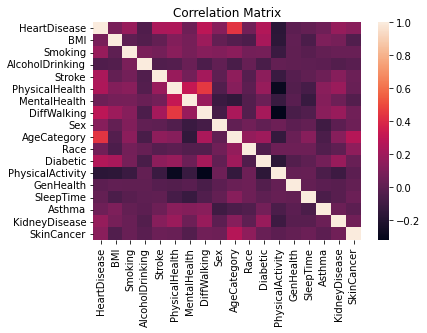

In [ ]:
sns.heatmap(heart_disease.corr())
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Splitting dataset into features and targets

X = heart_disease.drop(['HeartDisease'], axis = 1).values
y = heart_disease['HeartDisease'].values

In [ ]:
# Splitting data into training and tests

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [ ]:
# Feature Processing - Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Initialize lists for Classification Metrics Graph

cv_accuracy = []
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

In [ ]:
# Model Function

def build_model(model):

  # Fitting model to training dataset
  model.fit(X_train, y_train.ravel())

  # 5-Fold Cross Validation
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score

  k = 5
  kf = KFold(n_splits=k)

  result = cross_val_score(model, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
  print(f'5-Fold CV Avg accuracy:{result.mean()}', end ='\n \n')

  cv_accuracy.append(result.mean())

  # Predicting test set results
  y_pred = model.predict(X_test)

  # Classification Report
  from sklearn.metrics import classification_report

  print(classification_report(y_test, y_pred, target_names = ['Does Not Have Heart Disease', 'Has Heart Disease']))

  # Store accuracy, f1, precision, and recall in lists
  class_report = classification_report(y_test, y_pred, output_dict = True)
  accuracy_scores.append(class_report['accuracy'])
  f1_scores.append(class_report['weighted avg']['f1-score'])
  precision_scores.append(class_report['weighted avg']['precision'])
  recall_scores.append(class_report['weighted avg']['recall'])
  class_report

In [ ]:
# Building KNN Model

print('KNN:', end ='\n \n')

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
build_model(knn)

KNN:
 
5-Fold CV Avg accuracy:0.7246666666666666
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.71      0.75      0.73      2235
          Has Heart Disease       0.74      0.70      0.72      2265

                   accuracy                           0.73      4500
                  macro avg       0.73      0.73      0.73      4500
               weighted avg       0.73      0.73      0.73      4500



In [ ]:
# Building Naive Bayes Model

print('BNB:', end ='\n \n')

# Using Bernoulli Naive Bayes since most of the data is binary
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
build_model(bnb)

BNB:
 
5-Fold CV Avg accuracy:0.7279047619047618
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.70      0.77      0.73      2235
          Has Heart Disease       0.75      0.68      0.71      2265

                   accuracy                           0.72      4500
                  macro avg       0.72      0.72      0.72      4500
               weighted avg       0.72      0.72      0.72      4500



In [ ]:
# Building Logistic Regression Model

print('Log Reg:', end ='\n \n')

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
build_model(lr)

Log Reg:
 
5-Fold CV Avg accuracy:0.753047619047619
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.75      0.75      0.75      2235
          Has Heart Disease       0.75      0.76      0.76      2265

                   accuracy                           0.75      4500
                  macro avg       0.75      0.75      0.75      4500
               weighted avg       0.75      0.75      0.75      4500



In [ ]:
# Building SVM Linear Model

print('Linear SVM:', end ='\n \n')

from sklearn import svm

linear_svm = svm.SVC(kernel='linear', decision_function_shape='ovo')
build_model(linear_svm)

Linear SVM:
 
5-Fold CV Avg accuracy:0.7544761904761905
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.76      0.73      0.75      2235
          Has Heart Disease       0.75      0.77      0.76      2265

                   accuracy                           0.75      4500
                  macro avg       0.75      0.75      0.75      4500
               weighted avg       0.75      0.75      0.75      4500



In [ ]:
# Building SVM RBF Model

print('RBF SVM:', end ='\n \n')

rbf_svm = svm.SVC(kernel='rbf', decision_function_shape='ovo')
build_model(rbf_svm)

RBF SVM:
 
5-Fold CV Avg accuracy:0.7566666666666666
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.77      0.72      0.75      2235
          Has Heart Disease       0.74      0.79      0.77      2265

                   accuracy                           0.76      4500
                  macro avg       0.76      0.76      0.76      4500
               weighted avg       0.76      0.76      0.76      4500



In [ ]:
# Building SVM Polynomial Model

print('Polynomial SVM:', end ='\n \n')

poly_svm = svm.SVC(kernel='poly', decision_function_shape='ovo')
build_model(poly_svm)

Polynomial SVM:
 
5-Fold CV Avg accuracy:0.7443809523809524
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.74      0.75      0.75      2235
          Has Heart Disease       0.75      0.74      0.74      2265

                   accuracy                           0.75      4500
                  macro avg       0.75      0.75      0.75      4500
               weighted avg       0.75      0.75      0.75      4500



In [ ]:
# Building SVM Sigmoid Model

print('Sigmoid SVM:', end ='\n \n')

sig_svm = svm.SVC(kernel='sigmoid', decision_function_shape='ovo')
build_model(sig_svm)

Sigmoid SVM:
 
5-Fold CV Avg accuracy:0.6785714285714286
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.67      0.68      0.68      2235
          Has Heart Disease       0.68      0.67      0.67      2265

                   accuracy                           0.67      4500
                  macro avg       0.67      0.67      0.67      4500
               weighted avg       0.67      0.67      0.67      4500



In [ ]:
# Grid Search CV on SVMs

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_parameters = {
                  'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [0.001, 0.01, 0.1],
                  'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
                  }
SVM = SVC()

clf = GridSearchCV(SVM,         # model
                  param_grid = svm_parameters,   # hyperparameters
                  scoring='accuracy',        # metric for scoring
                  cv=5,                      # number of folds
                  verbose=2)

try:
  clf.fit(X_train, y_train.ravel())
except ValueError:
  print('Incompatible Parameters')

# Best combination of parameters
print(clf.best_params_)

#Best CV Score
print(clf.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   2.4s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   4.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   2.4s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   2.5s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   2.5s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   6.4s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   6.4s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   6.3s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   6.4s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   6.3s
[CV] END ..................C=0.001, gamma=0.001, kernel=poly; total time=   4.0s
[CV] END ..................C=0.001, gamma=0.001

In [ ]:
# Building Decision Tree Model

print('Decision Tree:', end ='\n \n')

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
build_model(dt)

Decision Tree:
 
5-Fold CV Avg accuracy:0.6594285714285715
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.66      0.68      0.67      2235
          Has Heart Disease       0.68      0.65      0.66      2265

                   accuracy                           0.67      4500
                  macro avg       0.67      0.67      0.67      4500
               weighted avg       0.67      0.67      0.67      4500



In [ ]:
# Parameters of Decision Tree
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Decision Tree - Feature Importance

# Get coefficients of different features
dt.feature_importances_

array([0.24505805, 0.02817025, 0.00951597, 0.02436478, 0.05511136,
       0.05096052, 0.04281183, 0.02659097, 0.22593706, 0.03025107,
       0.02994659, 0.02062922, 0.08687244, 0.07560229, 0.01749787,
       0.01043038, 0.02024934])

In [ ]:
feature_names = heart_disease.drop(['HeartDisease'], axis = 1).columns # Column name of features

# Feature Importance DataFrame
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0,ascending=False)
feature_importance

,0
BMI,0.245058
AgeCategory,0.225937
GenHealth,0.086872
SleepTime,0.075602
PhysicalHealth,0.055111
MentalHealth,0.050961
DiffWalking,0.042812
Race,0.030251
Diabetic,0.029947
Smoking,0.028170


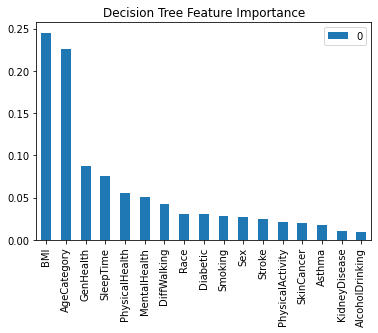

In [ ]:
# Bar plot showing feature importance
feature_importance.plot(kind='bar', title='Decision Tree Feature Importance')

In [ ]:
# Building Random Forest Model

print('Random Forest:', end ='\n \n')

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
build_model(rf)

Random Forest:
 
5-Fold CV Avg accuracy:0.7239047619047618
 
                             precision    recall  f1-score   support

Does Not Have Heart Disease       0.71      0.76      0.73      2235
          Has Heart Disease       0.75      0.70      0.72      2265

                   accuracy                           0.73      4500
                  macro avg       0.73      0.73      0.73      4500
               weighted avg       0.73      0.73      0.73      4500



In [ ]:
# Random Forest - Feature Importance

# Get coefficients of different features
rf.feature_importances_

# Feature Importance DataFrame
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0,ascending=False)
feature_importance

,0
BMI,0.210057
AgeCategory,0.205345
SleepTime,0.084241
GenHealth,0.083113
PhysicalHealth,0.066368
MentalHealth,0.056220
DiffWalking,0.046675
Diabetic,0.039158
Race,0.032988
Stroke,0.031519


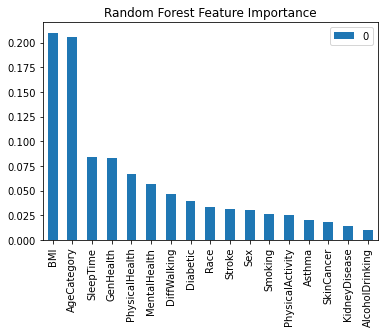

In [ ]:
# Bar plot showing feature importance
feature_importance.plot(kind='bar', title='Random Forest Feature Importance')

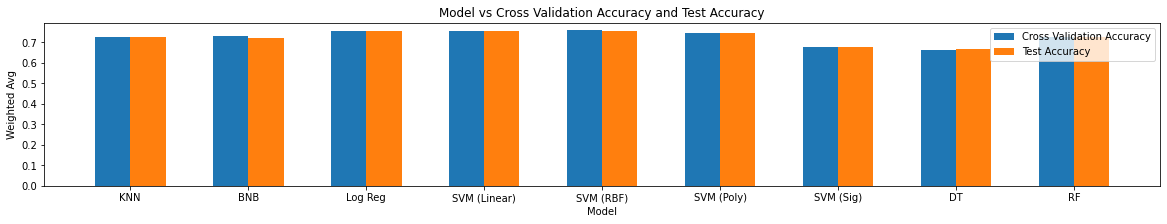

In [ ]:
# Cross Validation Accuracy Graph

models = ['KNN', 'BNB', 'Log Reg', 'SVM (Linear)', 'SVM (RBF)', 'SVM (Poly)', 'SVM (Sig)', 'DT', 'RF']

# Set x-axis length
X_axis = np.arange(len(models))

# Spacing between each bar
spacing= 0.15

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20,3)

# Plotting 2 bars for each model on the x-axis - Test Accuracy and CV Accuracy
plt.bar(X_axis-spacing, cv_accuracy, 0.3, label = 'Cross Validation Accuracy')
plt.bar(X_axis+spacing, accuracy_scores, 0.3, label = 'Test Accuracy')

# Setting the range of  X axis
plt.xticks(X_axis, models)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Cross Validation Accuracy and Test Accuracy")
plt.legend(loc='upper right')

plt.show()


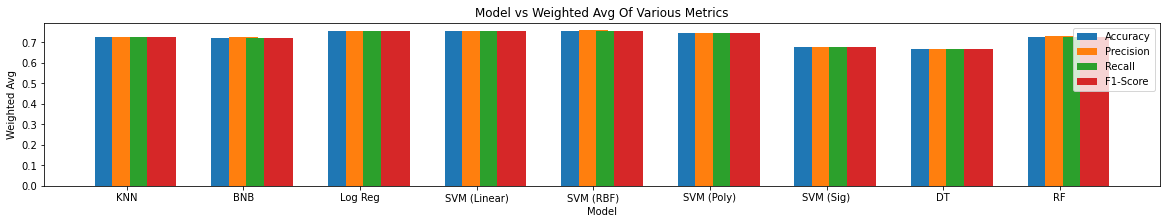

In [ ]:
# Classification Metrics Graph

models = ['KNN', 'BNB', 'Log Reg', 'SVM (Linear)', 'SVM (RBF)', 'SVM (Poly)', 'SVM (Sig)', 'DT', 'RF']

# Set x-axis length
X_axis = np.arange(len(models))

# Spacing between each bar
spacing= 0.15

# Setting the size of the graph
plt.rcParams["figure.figsize"] = (20,3)

# Plotting 4 bars for each model on the x-axis - Accuracy, Precision, Recall, and F1
plt.bar(X_axis - spacing, accuracy_scores, 0.25, label = 'Accuracy')
plt.bar(X_axis, precision_scores, 0.25, label = 'Precision')
plt.bar(X_axis + spacing, recall_scores, 0.25, label = 'Recall')
plt.bar(X_axis + spacing * 2, f1_scores, 0.25, label = 'F1-Score')

# Setting the range of  X axis
plt.xticks(X_axis, models)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Classification Metrics DataFrame

scores_dict = {'Model': models,
               'CV Accuracy': cv_accuracy,
               'Accuracy': accuracy_scores,
               'Precision': precision_scores,
               'Recall': recall_scores,
               'F1_score': f1_scores}

scores_df = pd.DataFrame(scores_dict).sort_values(by=['Accuracy'], ascending=False)
scores_df

,Model,CV Accuracy,Accuracy,Precision,Recall,F1_score
4,SVM (RBF),0.756667,0.756222,0.757489,0.756222,0.755834
2,Log Reg,0.753048,0.754222,0.754223,0.754222,0.754213
3,SVM (Linear),0.754476,0.753778,0.754102,0.753778,0.753651
5,SVM (Poly),0.744381,0.745111,0.745205,0.745111,0.745108
8,RF,0.723905,0.727333,0.728513,0.727333,0.727080
0,KNN,0.724667,0.725556,0.726404,0.725556,0.725382
1,BNB,0.727905,0.721556,0.723854,0.721556,0.720985
6,SVM (Sig),0.678571,0.674667,0.674760,0.674667,0.674660
7,DT,0.659429,0.667778,0.668015,0.667778,0.667730
